# Regresión Lineal desde Cero

Este notebook explica la implementación de Regresión Lineal desde cero, uno de los algoritmos más fundamentales en Machine Learning.

## ¿Qué es Regresión Lineal?

La Regresión Lineal es un algoritmo de aprendizaje supervisado que modela la relación entre una variable dependiente (y) y una o más variables independientes (X) usando una función lineal.

## Conceptos Fundamentales

- **Función lineal**: $y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n$
- **Coeficientes (β)**: Parámetros del modelo que se aprenden durante el entrenamiento
- **Gradiente Descendente**: Algoritmo de optimización para encontrar los mejores coeficientes
- **Error cuadrático medio (MSE)**: Función de costo que se minimiza


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns


## Ecuación de Regresión Lineal

Para regresión lineal simple (una variable):

$$y = \beta_0 + \beta_1 x$$

Para regresión lineal múltiple (múltiples variables):

$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n$$

En forma matricial:

$$y = X\beta$$

Donde:
- $X$ es la matriz de características (con columna de unos para el término de intercepto)
- $\beta$ es el vector de coeficientes


## Método 1: Ecuación Normal (Solución Analítica)

La solución analítica usando mínimos cuadrados:

$$\beta = (X^T X)^{-1} X^T y$$


In [2]:
class LinearRegressionNormal:
    """Regresión Lineal usando ecuación normal (solución analítica)"""
    
    def __init__(self):
        self.coefficients = None
        self.intercept = None
    
    def fit(self, X, y):
        """Entrena el modelo usando ecuación normal"""
        # Añadir columna de unos para el término de intercepto
        X_with_intercept = np.column_stack([np.ones(X.shape[0]), X])
        
        # Calcular coeficientes usando ecuación normal
        # β = (X^T X)^(-1) X^T y
        XTX = np.dot(X_with_intercept.T, X_with_intercept)
        XTy = np.dot(X_with_intercept.T, y)
        self.coefficients = np.linalg.solve(XTX, XTy)
        
        # Separar intercept y coeficientes
        self.intercept = self.coefficients[0]
        self.coefficients = self.coefficients[1:]
    
    def predict(self, X):
        """Hace predicciones"""
        return self.intercept + np.dot(X, self.coefficients)


## Método 2: Gradiente Descendente

Gradiente descendente es un algoritmo iterativo que minimiza la función de costo:

$$\text{Costo} = \frac{1}{2m} \sum_{i=1}^{m} (h_\beta(x^{(i)}) - y^{(i)})^2$$

Donde $h_\beta(x) = \beta_0 + \beta_1 x_1 + ... + \beta_n x_n$ es la hipótesis.

El gradiente se actualiza iterativamente:

$$\beta_j := \beta_j - \alpha \frac{\partial}{\partial \beta_j} \text{Costo}(\beta)$$


In [3]:
class LinearRegressionGradientDescent:
    """Regresión Lineal usando Gradiente Descendente"""
    
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        """
        Parámetros:
        - learning_rate: Tasa de aprendizaje (alpha)
        - n_iterations: Número de iteraciones
        """
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.coefficients = None
        self.intercept = None
        self.cost_history = []
    
    def fit(self, X, y):
        """Entrena el modelo usando gradiente descendente"""
        m, n = X.shape
        
        # Inicializar parámetros
        self.coefficients = np.zeros(n)
        self.intercept = 0
        
        # Normalizar características para mejor convergencia
        X_normalized = (X - np.mean(X, axis=0)) / (np.std(X, axis=0) + 1e-8)
        
        # Gradiente descendente
        for i in range(self.n_iterations):
            # Predicciones
            y_pred = self.intercept + np.dot(X_normalized, self.coefficients)
            
            # Calcular error
            error = y_pred - y
            
            # Calcular costo (MSE)
            cost = (1 / (2 * m)) * np.sum(error ** 2)
            self.cost_history.append(cost)
            
            # Calcular gradientes
            d_intercept = (1 / m) * np.sum(error)
            d_coefficients = (1 / m) * np.dot(X_normalized.T, error)
            
            # Actualizar parámetros
            self.intercept -= self.learning_rate * d_intercept
            self.coefficients -= self.learning_rate * d_coefficients
    
    def predict(self, X):
        """Hace predicciones"""
        X_normalized = (X - np.mean(X, axis=0)) / (np.std(X, axis=0) + 1e-8)
        return self.intercept + np.dot(X_normalized, self.coefficients)


## Ejemplo: Regresión Lineal Simple


In [4]:
# Generar datos sintéticos
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2.5 * X.flatten() + 1.5 + np.random.randn(100) * 2

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Usar ecuación normal
lr_normal = LinearRegressionNormal()
lr_normal.fit(X_train, y_train)
y_pred_normal = lr_normal.predict(X_test)

# Usar gradiente descendente
lr_gd = LinearRegressionGradientDescent(learning_rate=0.01, n_iterations=1000)
lr_gd.fit(X_train, y_train)
y_pred_gd = lr_gd.predict(X_test)

# Usar scikit-learn
lr_sklearn = LinearRegression()
lr_sklearn.fit(X_train, y_train)
y_pred_sklearn = lr_sklearn.predict(X_test)

# Comparar resultados
print("Ecuación Normal:")
print(f"  Intercept: {lr_normal.intercept:.4f}, Coeficiente: {lr_normal.coefficients[0]:.4f}")
print(f"  MSE: {mean_squared_error(y_test, y_pred_normal):.4f}")
print(f"  R²: {r2_score(y_test, y_pred_normal):.4f}")

print("\nGradiente Descendente:")
print(f"  Intercept: {lr_gd.intercept:.4f}, Coeficiente: {lr_gd.coefficients[0]:.4f}")
print(f"  MSE: {mean_squared_error(y_test, y_pred_gd):.4f}")
print(f"  R²: {r2_score(y_test, y_pred_gd):.4f}")

print("\nScikit-learn:")
print(f"  Intercept: {lr_sklearn.intercept_:.4f}, Coeficiente: {lr_sklearn.coef_[0]:.4f}")
print(f"  MSE: {mean_squared_error(y_test, y_pred_sklearn):.4f}")
print(f"  R²: {r2_score(y_test, y_pred_sklearn):.4f}")


Ecuación Normal:
  Intercept: 1.7358, Coeficiente: 2.4067
  MSE: 2.5238
  R²: 0.9624

Gradiente Descendente:
  Intercept: 13.0384, Coeficiente: 6.6835
  MSE: 4.4957
  R²: 0.9330

Scikit-learn:
  Intercept: 1.7358, Coeficiente: 2.4067
  MSE: 2.5238
  R²: 0.9624


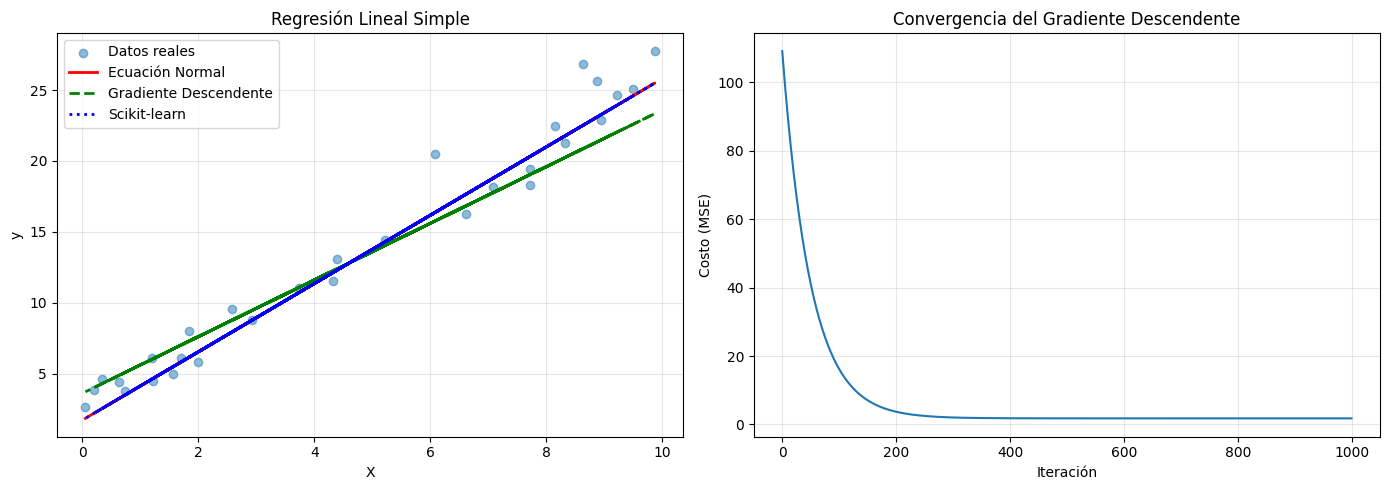

In [5]:
# Visualizar regresión
plt.figure(figsize=(14, 5))

# Gráfico 1: Datos y línea de regresión
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, alpha=0.5, label='Datos reales')
plt.plot(X_test, y_pred_normal, 'r-', linewidth=2, label='Ecuación Normal')
plt.plot(X_test, y_pred_gd, 'g--', linewidth=2, label='Gradiente Descendente')
plt.plot(X_test, y_pred_sklearn, 'b:', linewidth=2, label='Scikit-learn')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regresión Lineal Simple')
plt.legend()
plt.grid(True, alpha=0.3)

# Gráfico 2: Historial de costo (Gradiente Descendente)
plt.subplot(1, 2, 2)
plt.plot(lr_gd.cost_history)
plt.xlabel('Iteración')
plt.ylabel('Costo (MSE)')
plt.title('Convergencia del Gradiente Descendente')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Regresión Lineal Múltiple


In [6]:
# Ejemplo con múltiples características
X_multi, y_multi = datasets.make_regression(
    n_samples=100, n_features=3, noise=10, random_state=42
)

X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y_multi, test_size=0.3, random_state=42
)

# Entrenar modelos
lr_normal_multi = LinearRegressionNormal()
lr_normal_multi.fit(X_train_multi, y_train_multi)
y_pred_normal_multi = lr_normal_multi.predict(X_test_multi)

lr_sklearn_multi = LinearRegression()
lr_sklearn_multi.fit(X_train_multi, y_train_multi)
y_pred_sklearn_multi = lr_sklearn_multi.predict(X_test_multi)

print("Regresión Lineal Múltiple:")
print(f"\nCoeficientes (Ecuación Normal):")
print(f"  Intercept: {lr_normal_multi.intercept:.4f}")
for i, coef in enumerate(lr_normal_multi.coefficients):
    print(f"  Coeficiente {i+1}: {coef:.4f}")

print(f"\nCoeficientes (Scikit-learn):")
print(f"  Intercept: {lr_sklearn_multi.intercept_:.4f}")
for i, coef in enumerate(lr_sklearn_multi.coef_):
    print(f"  Coeficiente {i+1}: {coef:.4f}")

print(f"\nMSE: {mean_squared_error(y_test_multi, y_pred_normal_multi):.4f}")
print(f"R²: {r2_score(y_test_multi, y_pred_normal_multi):.4f}")


Regresión Lineal Múltiple:

Coeficientes (Ecuación Normal):
  Intercept: 0.9194
  Coeficiente 1: 27.5543
  Coeficiente 2: 74.4521
  Coeficiente 3: 18.0790

Coeficientes (Scikit-learn):
  Intercept: 0.9194
  Coeficiente 1: 27.5543
  Coeficiente 2: 74.4521
  Coeficiente 3: 18.0790

MSE: 132.1822
R²: 0.9827


## Ventajas y Desventajas

**Ventajas:**
- Simple de entender e implementar
- Muy rápido de entrenar
- Interpretable (los coeficientes tienen significado)
- No requiere ajuste de hiperparámetros
- Funciona bien cuando la relación es lineal

**Desventajas:**
- Asume relación lineal (puede no funcionar con relaciones no lineales)
- Sensible a outliers
- Puede tener problemas con multicolinealidad
- Requiere normalización para gradiente descendente

## Aplicaciones

- Predicción de precios
- Análisis de tendencias
- Modelado de relaciones causa-efecto
- Forecasting
- Análisis económico
